In [1]:
%%html
<!--Script block to left align Markdown Tables-->
<style>
  table {margin-left: 0 !important;}
</style>

In [2]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

atomickitty.aws
engr1330content
/opt/conda/envs/python/bin/python
3.8.3 (default, Jul  2 2020, 16:21:59) 
[GCC 7.3.0]
sys.version_info(major=3, minor=8, micro=3, releaselevel='final', serial=0)


# ENGR 1330 Computational Thinking with Data Science 
Last GitHub Commit Date: 16 Mar 2021

## Lesson 17 : A/B Testing and Confidence Intervals

A procedure to systematically decide if two data collections are similar or substantially different, and quantify the probability of the differences

<!--![](https://www.thermofisher.com/blog/wp-content/uploads/sites/11/2018/01/istock-829172394_redumbrella.jpg)-->

## Objectives
- To apply fundamental concepts involved in probability estimation modeling and descriptive statistics;
  - Are two sets different from each other?
  - What is the best estimate of a statistiv from a set, and its likely range?
  - 
---

## Computational Thinking Concepts
The CT concepts include:

- Abstraction => Represent data behavior with a statistic 
- Pattern Recognition => Compare patterns in (our) data models to make a decision
---

# Textbook Resources

[https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html)

You know the URL that no-one reads, perhaps because there is a "secret" module you need to install, without instructions of how! 

# A/B Testing 

Deciding whether two numerical samples come from the same underlying distribution is called A/B testing. The name refers to the labels of the two samples, A and B.  We have examined this kind of question already in prior labs.

We leave you to examine the example in the textbook on your own.  

<hr>

Much of what follows below is borrowed with some changes for our class from: https://pubs.usgs.gov/tm/04/a03/tm4a3.pdf


## Interval Estimates

Several summary statistics were presented that described key attributes of a dataset, including sample estimates such as $\bar x$ and $s^2$, of true and unknown population parameters, such as $\mu$, the population mean, and $\sigma^2$, the population variance. 

What follows are methods to describe the uncertainty or reliability of sample estimates. As an alternative to reporting a single estimate, the utility of reporting a range of values called an interval estimate is demonstrated. Both parametric and nonparametric interval estimates are presented. These intervals can also be used to test whether the population parameter is significantly different from some prespecified value.

### Definition of Interval Estimates

The sample median and sample mean are two types of estimates of the central tendency of a population. Such estimates are called point estimates. By themselves, point estimates do not portray the reliability, or lack of reliability (variability), of these estimates. For example, suppose that two datasets—X and Y—exist, both have a sample mean of about 50 and contain the same number of observations. 

In [3]:
import numpy
import pandas
process1 = []
process2 = []
for i in range(1,101,1):
    process1.append(i)
for i in range(41,61,1):
    process2.append(i)
    

In [4]:
#process2

                X           Y
count  500.000000  500.000000
mean    48.172000   51.276000
std     28.721355    5.799923
min      1.000000   41.000000
25%     22.000000   47.000000
50%     48.000000   51.000000
75%     72.000000   56.000000
max    100.000000   60.000000


<AxesSubplot:ylabel='Frequency'>

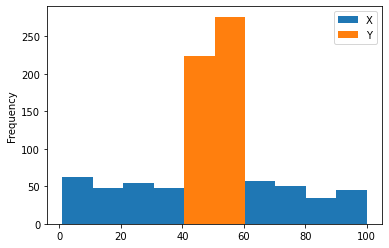

In [5]:
x = numpy.random.choice(process1,500)
y = numpy.random.choice(process2,500)

# make lists into dataframe 
boxdf = pandas.DataFrame()
boxdf['X']=x
boxdf['Y']=y

# describe lists/dataframe 
print(boxdf.describe())

boxdf.plot.hist() # 

The Y data all cluster tightly around 50; the X data are much more variable. The point estimate of 50 for dataset X is less certain than the point estimate for dataset Y because of the greater variability in the X data. Reporting only the sample (point) estimate of 50 fails to give any hint of this difference, although it is graphically quite evident.

We would then recall we have been hypothesis testing the crap out of things, so we can apply those tools:

In [6]:
# are the samples approximatley normal?
# the Shapiro-Wilk Normality Test for set1
from scipy.stats import shapiro
stat, p = shapiro(boxdf['X'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.957, p=0.000
Probably not Gaussian


In [7]:
# are the samples approximatley normal?
# the Shapiro-Wilk Normality Test for set1
from scipy.stats import shapiro
stat, p = shapiro(boxdf['Y'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.945, p=0.000
Probably not Gaussian


In [8]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(boxdf['X'],boxdf['Y'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same mean')
else:
    print('Probably different mean')

statistic=117017.000, p-value at rejection =0.040
Probably different mean


At this point we know that the mean values are about the same, but the two datasets are not alike (its the variance stupid!)

As an alternative to just point estimates, interval estimates are intervals that have a stated probability of containing the true population value. In our example, the mean for Y is 50 and we are pretty sure of that, because the sample variance is small - if our sample had also tested as normal we could state that the estimate of population mean is 50 +/- 18 ( 3 standard deviations) with probability of 99%.  Such a statement is an interval estimate.

In general, we will be presenting two-sided intervals (where the probability of the true value being higher than the upper limit is assumed to be equal to the probability of its being lower than the lower limit). There are also one-sided intervals. The intervals are wider for datasets having greater variability and the same number of data points. 

Thus, in the above example, an interval between 38 and 62 may have a 95-percent probability of containing the (unknown) true population mean of dataset Y. It would take a much wider interval, say between -6 and 106, to have the same probability of containing the true mean of dataset X. 

The difference in the reliability of the two estimates is therefore clearly stated using interval estimates. Interval estimates can provide two pieces of information which point estimates cannot:
1. A statement of the probability or likelihood that the interval contains the true population value (its reliability).
2. A statement of the likelihood that a single data point with specified magnitude comes from the population under study.

Interval estimates for the first purpose are called confidence intervals; intervals for the second purpose are called prediction intervals. Though related, the two types of interval estimates are not identical, and should not be interchanged.

# First a visit with our textbook!

<hr>

Much of what follows below is borrowed with minor changes for our class from: https://www.inferentialthinking.com/chapters/13/1/Percentiles.html


## Percentiles

Numerical data can be sorted in increasing or decreasing order. Thus the values of a numerical data set have a rank order. A percentile is the value at a particular rank.  *We have exploited this is our plotting position formulas earlier.*

For example, if your score on a test is on the 95th percentile, a common interpretation is that only 5% of the scores were higher than yours. The median is the 50th percentile; it is commonly assumed that 50% the values in a data set are above the median.

But some care is required in giving percentiles a precise definition that works for all ranks and all lists. To see why, consider an extreme example where all the students in a class score 75 on a test. Then 75 is a natural candidate for the median, but it's not true that 50% of the scores are above 75. Also, 75 is an equally natural candidate for the 95th percentile or the 25th or any other percentile. Ties – that is, equal data values – have to be taken into account when defining percentiles.

You also have to be careful about exactly how far up the list to go when the relevant index isn't clear. For example, what should be the 87th percentile of a collection of 10 values? The 8th value of the sorted collection, or the 9th, or somewhere in between? *Again we have already addressed this issue with our plotting position formulas earlier.*

## A Numerical Example 

Before giving a general definition of all percentiles, we will define the 80th percentile of a collection of values to be the smallest value in the collection that is at least as large as 80% of all of the values.

For example, let's consider the sizes of the five largest continents – Africa, Antarctica, Asia, North America, and South America – rounded to the nearest million square miles.

In [9]:
import datascience
sizes = datascience.make_array(12, 17, 6, 9, 7)

The 80th percentile is the smallest value that is at least as large as 80% of the elements of sizes, that is, four-fifths of the five elements. That's 12:

In [10]:
numpy.sort(sizes)

array([ 6,  7,  9, 12, 17])

The 80th percentile is a value on the list, namely 12. You can see that 80% of the values are less than or equal to it, and that it is the smallest value on the list for which this is true.

Analogously, the 70th percentile is the smallest value in the collection that is at least as large as 70% of the elements of sizes. Now 70% of 5 elements is "3.5 elements", so the 70th percentile is the 4th element on the list. That's 12, the same as the 80th percentile for these data.  * Not terribly useful yet but wait there's more!*

## The percentile function 

**A Data8 Function**

The percentile function takes two arguments: a rank between 0 and 100, and a array. It returns the corresponding percentile of the array.

In [11]:
datascience.percentile(80, sizes)

12

## The General Definition 
**Below is from the Data8 Textbook -- compare to our lab on plotting position formulas)**

Let 𝑝 be a number between 0 and 100. The 𝑝-th percentile of a collection is the smallest value in the collection that is at least as large as p% of all the values.

By this definition, any percentile between 0 and 100 can be computed for any collection of values, and it is always an element of the collection.

In practical terms, suppose there are 𝑛 elements in the collection. To find the 𝑝-th percentile:

- Sort the collection in increasing order.
- Find p% of n: (𝑝/100)×𝑛 Call that 𝑘
- If 𝑘 is an integer, take the 𝑘-th element of the sorted collection.
- If 𝑘 is not an integer, round it up to the next integer, and take that element of the sorted collection.

### Example 
The table scores_and_sections contains one row for each student in a class of 359 students. The columns are the student's discussion section and midterm score.

Path to file is `http://54.243.252.9/engr-1330-psuedo-course/CECE-1330-PsuedoCourse/4-Databases/`


The table scores_and_sections contains one row for each student in a class of 359 students. The columns are the student's discussion section and midterm score.

In [12]:
scores_and_sections = datascience.Table.read_table('scores_by_section.csv')
scores_and_sections

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


If we make a histogram (using the Data8 tools from our textbook) can we approximate the 85%?  (just by looking it seems to be at 22-ish from the plot)

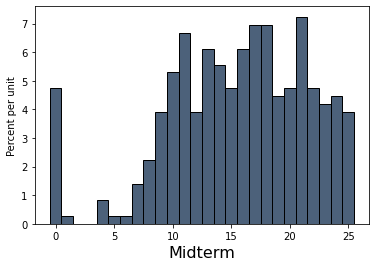

In [13]:
scores_and_sections.select('Midterm').hist(bins=numpy.arange(-0.5, 25.6, 1))

In [14]:
datascience.percentile(85, scores_and_sections.column(1))

22

So the eyeball value was not too bad! According to the percentile function, the 85th percentile was 22. To check that this is consistent with the definition, let's apply the definition directly.

First, put the scores in increasing order:

In [15]:
sorted_scores = numpy.sort(scores_and_sections.column(1))
len(sorted_scores)

359

There are 359 scores in the array. So next, find 85% of 359, which is 305.15.

In [16]:
0.85 * 359

305.15

That's not an integer. By the definition, the 85th percentile is the 306th element of sorted_scores, which, by Python's indexing convention, is item 305 of the array.

In [17]:
# The 306th element of the sorted array
sorted_scores.item(305)

22

That's the same as the answer we got by using percentile. In future, we will just use percentile.

### Quartiles 

The first quartile of a numercial collection is the 25th percentile. The terminology arises from the first quarter. The second quartile is the median, and the third quartile is the 75th percentile.

For our scores data, those values are:

In [18]:
print(datascience.percentile(25, sorted_scores))
print(datascience.percentile(50, sorted_scores))
print(datascience.percentile(75, sorted_scores))

11
16
20


In [19]:
pandas.DataFrame(sorted_scores).describe()

,0
count,359.000000
mean,15.493036
std,6.081323
min,0.000000
25%,11.000000
50%,16.000000
75%,20.000000
max,25.000000


### Bootstrapping

A data scientist is using the data in a random sample to estimate an unknown parameter. She uses the sample to calculate the value of a statistic that she will use as her estimate.

Once she has calculated the observed value of her statistic, she could just present it as her estimate and go on her merry way. But she knows that her random sample is just one of numerous possible random samples, and thus her estimate is just one of numerous plausible estimates.

By how much could those estimates vary? To answer this, it appears as though she needs to draw another sample from the population, and compute a new estimate based on the new sample. But she doesn't have the cash to go back to the population and draw another sample.

It looks as though the data scientist is stuck, but a method called the bootstrap (or just bootstrapping) can help out. Because it is not feasible to generate new samples from the population, the bootstrap generates new random samples by a method called resampling: the new samples are drawn at random from the original sample.  (Essentially, the orginal sample is now treated as a complete population - its a hack, but surprisingly useful)


### Employee Compensation in the City of San Francisco

SF OpenData is a website where the City and County of San Francisco make some of their data publicly available. One of the data sets contains compensation data for employees of the City. These include medical professionals at City-run hospitals, police officers, fire fighters, transportation workers, elected officials, and all other employees of the City.

Compensation data for the calendar year 2015 are in the table sf2015.

In [20]:
! cp /home/compthink/CECE-1330-PsuedoCourse/4-Databases/san_francisco_2015.csv ./
sf2015 = datascience.Table.read_table('san_francisco_2015.csv')
sf2015

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561
Calendar,2015,4,Community Health,DPH,Public Health,351,Municipal Executive Association - Miscellaneous,0900,Management,2620,Food Service Mgr Administrator,26718,28430.2,0,763.07,29193.3,0,4223.14,5208.51,9431.65,38625
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8201,School Crossing Guard,45810,7948.75,0,0,7948.75,0,2873.17,616.24,3489.41,11438.2
Calendar,2015,1,Public Protection,POL,Police,911,Police Officers' Association,Q000,Police Services,Q002,Police Officer,32906,2235,0,0,2235,490.36,286.72,176.57,953.65,3188.65
Calendar,2015,4,Community Health,DPH,Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2328,Nurse Practitioner,7506,187247,0,11704.1,198951,37683.7,12424.5,11221.7,61329.9,260281
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 250-A",9100,Street Transit,9163,Transit Operator,36773,66988.5,3512.88,2770.39,73271.8,19127.2,13203,5455.1,37785.3,111057
Calendar,2015,6,General Administration & Finance,CAT,City Attorney,311,Municipal Attorneys' Association,8100,Legal & Court,8177,Attorney (Civil/Criminal),12963,135190,0,1562.5,136752,27501.8,12424.5,10103,50029.3,186781
Calendar,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",9700,Community Development,9703,Emp & Training Spec 2,35179,70474.8,147.28,1647.24,72269.3,14650.3,10696.9,5993.11,31340.3,103610


There is one row for each of 42,979 employees. There are numerous columns containing information about City departmental affiliation and details of the different parts of the employee's compensation package. Here is the row correspoding to the late Edward Lee, the Mayor at that time.



In [21]:
sf2015.where('Job', datascience.are.equal_to('Mayor'))

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,6,General Administration & Finance,MYR,Mayor,556,Elected Officials,1100,Administrative & Mgmt (Unrep),1190,Mayor,22433,288964,0,0,288964,58117,12424.5,20293,90834.5,379798


We are going to study the final column, Total Compensation. That's the employee's salary plus the City's contribution towards his/her retirement and benefit plans.

Financial packages in a calendar year can sometimes be hard to understand as they depend on the date of hire, whether the employee is changing jobs within the City, and so on. For example, the lowest values in the Total Compensation column look a little strange.

In [22]:
sf2015.sort('Total Compensation')

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,1,Public Protection,FIR,Fire Department,798,"Firefighters - Miscellaneous, Local 798",H000,Fire Services,H002,Firefighter,43833,0,0,0,0,0,0,-423.76,-423.76,-423.76
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",9900,Public Service Aide,9924,PS Aide Health Services,27871,-292.4,0,0,-292.4,0,-95.58,-22.63,-118.21,-410.61
Calendar,2015,1,Public Protection,JUV,Juvenile Probation,790,"SEIU - Miscellaneous, Local 1021",8300,Correction & Detention,8320,"Counselor, Juvenile Hall",10517,0,0,0,0,0,0,-159.12,-159.12,-159.12
Calendar,2015,6,General Administration & Finance,CPC,City Planning,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1000,Information Systems,1053,IS Business Analyst-Senior,18961,0,0,0,0,0,0,-26.53,-26.53,-26.53
Calendar,2015,6,General Administration & Finance,CPC,City Planning,21,"Prof & Tech Engineers - Miscellaneous, Local 21",5200,Professional Engineering,5277,Planner 1,19387,0,0,0,0,0,0,-9.51,-9.51,-9.51
Calendar,2015,2,"Public Works, Transportation & Commerce",PUC,PUC Public Utilities Commission,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1000,Information Systems,1044,IS Engineer-Principal,28988,0,0,0,0,0,0,-3.1,-3.1,-3.1
Calendar,2015,1,Public Protection,JUV,Juvenile Probation,39,"Stationary Engineers, Local 39",7300,Journeyman Trade,7335,Senior Stationary Engineer,19125,0,0,0,0,0,0,-0.01,-0.01,-0.01
Calendar,2015,1,Public Protection,ECD,Department of Emergency Management,351,Municipal Executive Association - Miscellaneous,0900,Management,0922,Manager I,30025,0,0,0,0,0,0,0,0,0
Calendar,2015,7,General City Responsibilities,UNA,General Fund Unallocated,790,"SEIU - Miscellaneous, Local 1021",3200,Recreation,3280,Assistant Recreation Director,49784,0,0,0,0,0,0,1.27,1.27,1.27
Calendar,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",2600,Dietary & Food,2654,Cook,26768,0,0,2.21,2.21,0,0,0.17,0.17,2.38


For clarity of comparison, we will focus our attention on those who had at least the equivalent of a half-time job for the whole year. At a minimum wage of about \\$10 per hour, and 20 hours per week for 52 weeks, that's a salary of about \\$10,000.

In [23]:
sf2015 = sf2015.where('Salaries', datascience.are.above(10000))

sf2015.num_rows

36569

#### Population and Parameter

Let this table of just over 36,500 rows be our population. Here is a histogram of the total compensations.

/opt/conda/envs/python/lib/python3.8/site-packages/datascience/tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


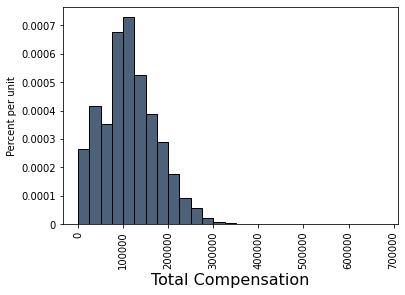

In [24]:
sf_bins = numpy.arange(0, 700000, 25000)
sf2015.select('Total Compensation').hist(bins=sf_bins)

While most of the values are below \\$300,000, a few are quite a bit higher. For example, the total compensation of the Chief Investment Officer was almost \\$650,000. That is why the horizontal axis stretches to \\$700,000.

In [25]:
sf2015.sort('Total Compensation', descending=True).show(2)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,6,General Administration & Finance,RET,Retirement System,351,Municipal Executive Association - Miscellaneous,1100,Administrative & Mgmt (Unrep),1119,Chief Investment Officer,46881,507832,0,0,507832,105053,12424.5,23566.2,141044,648875
Calendar,2015,6,General Administration & Finance,ADM,General Services Agency - City Admin,164,Physicians and Dentists - Miscellaneous,2500,Med Therapy & Auxiliary,2598,Asst Med Examiner,1016,279311,3829.36,114434,397574,56211.6,12424.5,14299.1,82935.2,480509


Now let the parameter be the median of the total compensations.

Since we have the luxury of having all of the data from the population, we can simply calculate the parameter:

In [26]:
pop_median = datascience.percentile(50, sf2015.column('Total Compensation'))
pop_median

110305.79

The median total compensation of all employees was just over \\$110,300.

From a practical perspective, there is no reason for us to draw a sample to estimate this parameter since we simply know its value. But in this section we are going to pretend we don't know the value, and see how well we can estimate it based on a random sample.

### A Random Sample and an Estimate

Let us draw a sample of 500 employees at random without replacement, and let the median total compensation of the sampled employees serve as our estimate of the parameter.

Estimated Median =  116683.09


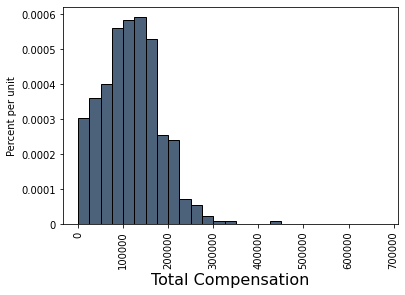

In [27]:
our_sample = sf2015.sample(500, with_replacement=False)
our_sample.select('Total Compensation').hist(bins=sf_bins)
est_median = datascience.percentile(50, our_sample.column('Total Compensation'))
print('Estimated Median = ',est_median)

The sample size is large, so that the distribution of the sample approximates that of the population, and consequently the sample median is not very far from the population median (though of course it is not exactly the same).

So now we have one estimate of the parameter. But had the sample come out differently, the estimate would have had a different value. We would like to be able to quantify the amount by which the estimate could vary across samples. That measure of variability will help us measure how accurately we can estimate the parameter.

To see how different the estimate would be if the sample had come out differently, we could just draw another sample from the population, but that would be cheating. We are trying to mimic real life, in which we won't have all the population data at hand.

Somehow, we have to get another random sample without sampling from the population.

### The Bootstrap: Resampling from the Sample
What we do have is a large random sample from the population. As we know, a large random sample is likely to resemble the population from which it is drawn. This observation allows data scientists to lift themselves up by their own bootstraps: the sampling procedure can be replicated by sampling from the sample.

Here are the steps of the bootstrap method for generating another random sample that resembles the population:

    Treat the original sample as if it were the population.
    Draw from the sample, at random with replacement, the same number of times as the original sample size.

It is important to resample the same number of times as the original sample size. The reason is that the variability of an estimate depends on the size of the sample. Since our original sample consisted of 500 employees, our sample median was based on 500 values. To see how different the sample could have been, we have to compare it to the median of other samples of size 500.

If we drew 500 times at random without replacement from our sample of size 500, we would just get the same sample back. By drawing with replacement, we create the possibility for the new samples to be different from the original, because some employees might be drawn more than once and others not at all.

Why is this a good idea? Because the distribution of the original sample is likely to resemble the population (if we took enough instances), and the distributions of all the "resamples" are likely to resemble the original sample. Then by an appeal to the transitive axiom, the distributions of all the resamples are likely to resemble the population as well.

### A Resampled Median

Recall that when the sample method is used without specifying a sample size, by default the sample size equals the number of rows of the table from which the sample is drawn. That's perfect for the bootstrap! Here is one new sample drawn from the original sample, and the corresponding sample median.

117124.37

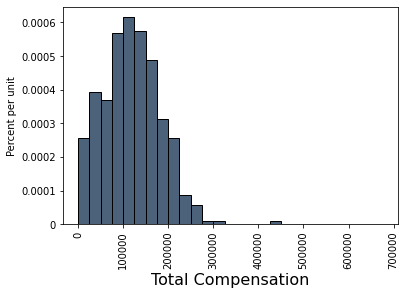

In [28]:
resample_1 = our_sample.sample()
resample_1.select('Total Compensation').hist(bins=sf_bins)
resampled_median_1 = datascience.percentile(50, resample_1.column('Total Compensation'))
resampled_median_1

By resampling, we have another estimate of the population median. By resampling again and again, we will get many such estimates, and hence an empirical distribution of the estimates.

In [29]:
resample_2 = our_sample.sample()
resampled_median_2 = datascience.percentile(50, resample_2.column('Total Compensation'))
resampled_median_2

109602.14

#### Bootstrap Empirical Distribution of the Sample Median

Let us define a function `bootstrap_median` that takes our original sample, the label of the column containing the variable, and the number of bootstrap samples we want to take, and returns an array of the corresponding resampled medians.

Each time we resample and find the median, we replicate the bootstrap process. So the number of bootstrap samples will be called the number of replications.

In [30]:
def bootstrap_median(original_sample, label, replications):
    """Returns an array of bootstrapped sample medians:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    modified by t.g. cleveland for missing dependencies from 
    original UCB script
    """
    just_one_column = original_sample.select(label)
    medians = datascience.make_array()
    for i in numpy.arange(replications):
        bootstrap_sample = just_one_column.sample()
        resampled_median = datascience.percentile(50, bootstrap_sample.column(0))
        medians = numpy.append(medians, resampled_median)
        
    return medians

We now replicate the bootstrap process 5,000 times. The array bstrap_medians contains the medians of all 5,000 bootstrap samples. Notice that the code takes longer to run than our previous code. It has a lot of resampling to do!

In [31]:
bstrap_medians = bootstrap_median(our_sample, 'Total Compensation', 5000) # change the 5 to 5000 for production run!

Here is the histogram of the 5000 medians. The red dot is the population parameter: it is the median of the entire population, which we happen to know but did not use in the bootstrap process.

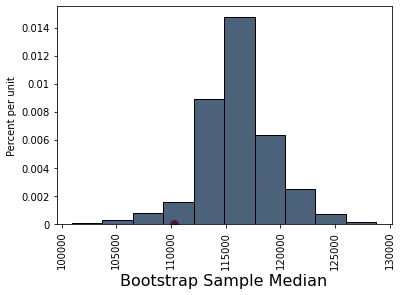

In [32]:
resampled_medians = datascience.Table().with_column('Bootstrap Sample Median', bstrap_medians)

#median_bins=np.arange(100000, 130000, 2500)
#resampled_medians.hist(bins = median_bins)
resampled_medians.hist()

import matplotlib.pyplot 
matplotlib.pyplot.scatter(pop_median, 0, color='red', s=60)

It is important to remember that the red dot is fixed: it is \\$110,305.79, the population median. The empirical histogram is the result of random draws, and will be situated randomly relative to the red dot.

Remember also that the point of all these computations is to estimate the population median, which is the red dot. Our estimates are all the randomly generated sampled medians whose histogram you see above. We want those estimates to contain the parameter – it they don't, then they are off.

### Do the Estimates Capture the Parameter?

How often does the empirical histogram of the resampled medians sit firmly over the red dot, and not just brush the dot with its tails? To answer this, we must define "sit firmly". 
Let's take that to mean "the middle 95% of the resampled medians contains the red dot".

Here are the two ends of the "middle 95%" interval of resampled medians:

In [33]:
left = datascience.percentile(2.5, bstrap_medians)
right = datascience.percentile(97.5, bstrap_medians)
print("lower/upper bounds of 95-percent of sample range \n",left," ",right)

lower/upper bounds of 95-percent of sample range 
 108876.57   123076.11


The population median of \\$110,305 is indeed between these two numbers. The interval and the population median are shown on the histogram below.

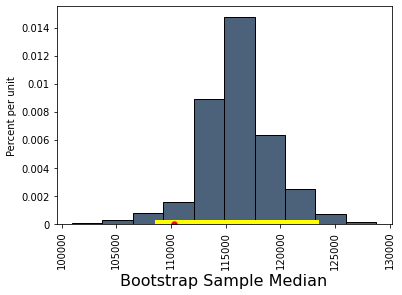

In [34]:
#median_bins=np.arange(100000, 130000, 2500)
#resampled_medians.hist(bins = median_bins)
resampled_medians.hist()

matplotlib.pyplot.plot(datascience.make_array(left, right), datascience.make_array(0, 0), color='yellow', lw=9, zorder=1)
matplotlib.pyplot.scatter(pop_median, 0, color='red', s=30, zorder=2);

The "middle 95%" interval of estimates captured the parameter in our example. But was that a fluke?

To see how frequently the interval contains the parameter, we have to run the entire process over and over again. Specifically, we will repeat the following process 100 times:

    Draw an original sample of size 500 from the population.
    Carry out 5,000 replications of the bootstrap process and generate the "middle 95%" interval of resampled medians.

We will end up with 100 intervals, and count how many of them contain the population median.

Spoiler alert: The statistical theory of the bootstrap says that the number should be around 95. It may be in the low 90s or high 90s, but not much farther off 95 than that.

In [35]:
# THE BIG SIMULATION: This one takes several minutes.
# Generate 100 intervals, in the table intervals
# modified by tgc for UCB dependencies not loaded as part of textbook
# test 26oct2020 on AWS server runtime == about 4 minutes
left_ends = datascience.make_array()
right_ends = datascience.make_array()

total_comps = sf2015.select('Total Compensation')

for i in numpy.arange(100):
    first_sample = total_comps.sample(500, with_replacement=False)
    medians = bootstrap_median(first_sample, 'Total Compensation', 5000)
    left_ends = numpy.append(left_ends, datascience.percentile(2.5, medians))
    right_ends = numpy.append(right_ends, datascience.percentile(97.5, medians))

intervals = datascience.Table().with_columns(
    'Left', left_ends,
    'Right', right_ends
)

For each of the 100 replications, we get one interval of estimates of the median.

In [36]:
intervals

Left,Right
103083,114184
105438,114596
110376,122139
97979.5,110533
106331,115592
101350,113414
108267,118965
102832,113948
101759,114192
104551,114630


The good intervals are those that contain the parameter we are trying to estimate. Typically the parameter is unknown, but in this section we happen to know what the parameter is.

In [37]:
pop_median

110305.79

How many of the 100 intervals contain the population median? That's the number of intervals where the left end is below the population median and the right end is above.

In [38]:
intervals.where('Left', datascience.are.below(pop_median)).where('Right', datascience.are.above(pop_median)).num_rows

96

It takes a few minutes to construct all the intervals, but try it again if you have the patience. Most likely, about 95 of the 100 intervals will be good ones: they will contain the parameter.

It's hard to show you all the intervals on the horizontal axis as they have large overlaps – after all, they are all trying to estimate the same parameter. The graphic below shows each interval on the same axes by stacking them vertically. The vertical axis is simply the number of the replication from which the interval was generated.

The red line is where the parameter is. Good intervals cover the parameter; there are about 95 of these, typically.

If an interval doesn't cover the parameter, it's a dud. The duds are the ones where you can see "daylight" around the red line. There are very few of them – about 5, typically – but they do happen.

Any method based on sampling has the possibility of being off. The beauty of methods based on random sampling is that we can quantify how often they are likely to be off.

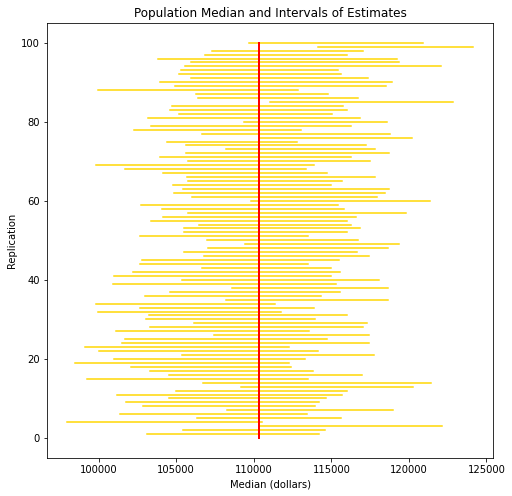

In [39]:
replication_number = numpy.ndarray.astype(numpy.arange(1, 101), str)
intervals2 = datascience.Table(replication_number).with_rows(datascience.make_array(left_ends, right_ends))

matplotlib.pyplot.figure(figsize=(8,8))
for i in numpy.arange(100):
    ends = intervals2.column(i)
    matplotlib.pyplot.plot(ends, datascience.make_array(i+1, i+1), color='gold')
matplotlib.pyplot.plot(datascience.make_array(pop_median, pop_median), datascience.make_array(0, 100), color='red', lw=2)
matplotlib.pyplot.xlabel('Median (dollars)')
matplotlib.pyplot.ylabel('Replication')
matplotlib.pyplot.title('Population Median and Intervals of Estimates');


To summarize what the simulation shows, suppose you are estimating the population median by the following process:

    Draw a large random sample from the population.
    Bootstrap your random sample and get an estimate from the new random sample.
    Repeat the above step thousands of times, and get thousands of estimates.
    Pick off the "middle 95%" interval of all the estimates.

That gives you one interval of estimates. Now if you repeat the entire process 100 times, ending up with 100 intervals, then about 95 of those 100 intervals will contain the population parameter.

In other words, this process of estimation captures the parameter about 95% of the time.

You can replace 95% by a different value, as long as it's not 100. Suppose you replace 95% by 80% and keep the sample size fixed at 500. Then your intervals of estimates will be shorter than those we simulated here, because the "middle 80%" is a smaller range than the "middle 95%". Only about 80% of your intervals will contain the parameter.

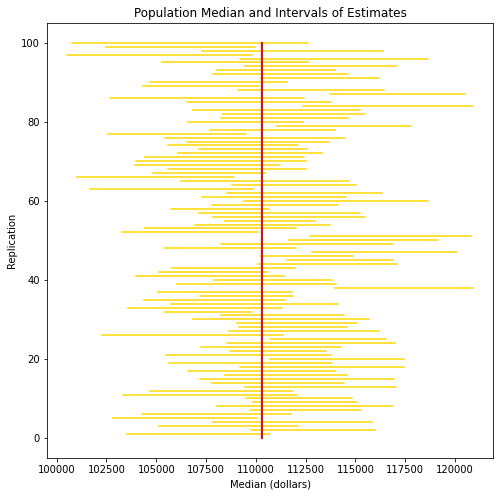

In [40]:
# THE BIG SIMULATION: This one takes several minutes.
# Generate 100 intervals, in the table intervals
# modified by tgc for UCB dependencies not loaded as part of textbook
# test 26oct2020 on AWS server runtime == about 4 minutes
left_ends = datascience.make_array()
right_ends = datascience.make_array()

total_comps = sf2015.select('Total Compensation')

for i in numpy.arange(100):
    first_sample = total_comps.sample(500, with_replacement=False)
    medians = bootstrap_median(first_sample, 'Total Compensation', 5000)
    left_ends = numpy.append(left_ends, datascience.percentile(10, medians))
    right_ends = numpy.append(right_ends, datascience.percentile(90, medians))

intervals = datascience.Table().with_columns(
    'Left', left_ends,
    'Right', right_ends
)

replication_number = numpy.ndarray.astype(numpy.arange(1, 101), str)
intervals3 = datascience.Table(replication_number).with_rows(datascience.make_array(left_ends, right_ends))

matplotlib.pyplot.figure(figsize=(8,8))
for i in numpy.arange(100):
    ends = intervals3.column(i)
    matplotlib.pyplot.plot(ends, datascience.make_array(i+1, i+1), color='gold')
matplotlib.pyplot.plot(datascience.make_array(pop_median, pop_median), datascience.make_array(0, 100), color='red', lw=2)
matplotlib.pyplot.xlabel('Median (dollars)')
matplotlib.pyplot.ylabel('Replication')
matplotlib.pyplot.title('Population Median and Intervals of Estimates');

## Next Time
Lesson 18 will continue along these lines, and present without much theory methods for different estimates -- they all share the same underlying principles illustrated here.